In [0]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

Import fast.ai 

In [0]:
from fastai import *
from fastai.vision import *
from fastai.core import *

Connect to Google Drive to get data

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Loading the data in a ImageDataBunch compatible format, i.e, /train, /valid etc.

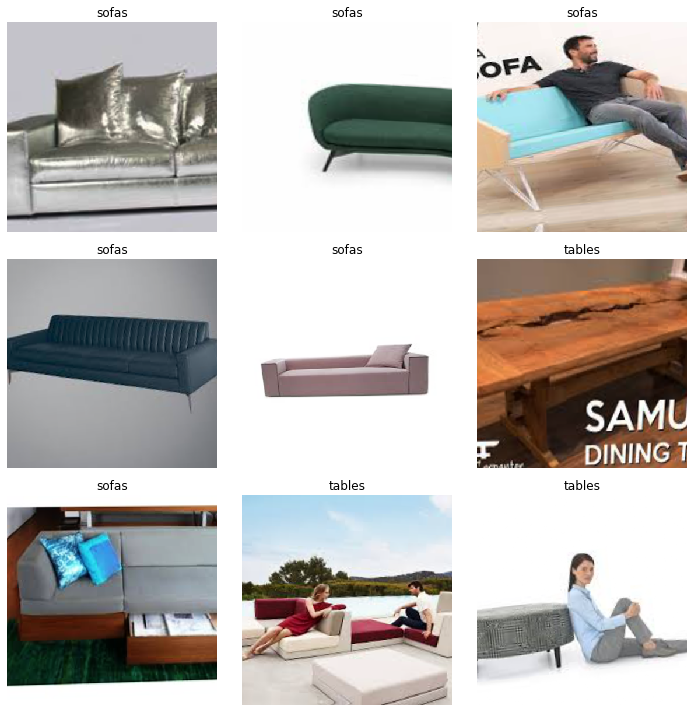

In [4]:
path = Path('/content/gdrive/My Drive/Colab Notebooks/Deep Learning/UngradedAssignment1')
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=360)
data.show_batch(rows=3, figsize=(10,10))

Using fastai's CNN implementation with RESNET34 model

In [5]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


Choosing learning rate of 4, after trying with 10, 3 and choosing b/w tradeoffs

In [6]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.303105,0.700080,0.833333,00:07
1,0.872856,1.127640,0.833333,00:05
2,0.670332,1.197360,0.833333,00:05
3,0.589197,1.058279,0.833333,00:05


Displaying the test data that have top losses(errors). Though some have matching actual and predicted, their confidence probability is less.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


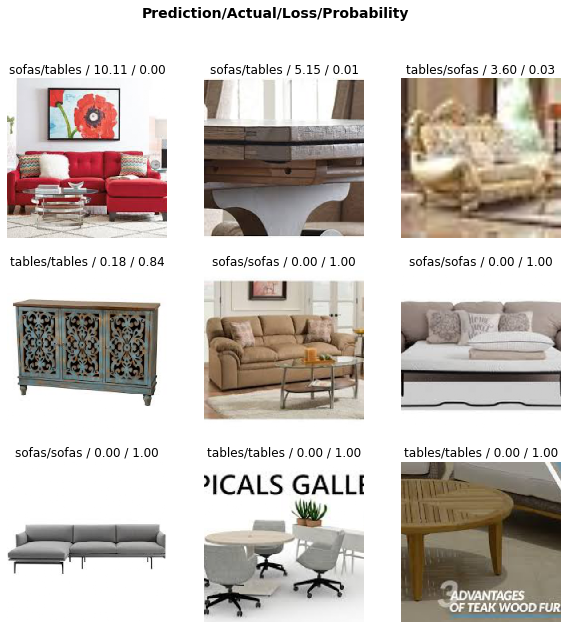

In [7]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_top_losses(9, figsize=(10,10))

Confusion Matrix to evaluate the model

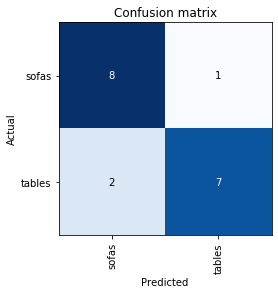

In [8]:
interp.plot_confusion_matrix()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


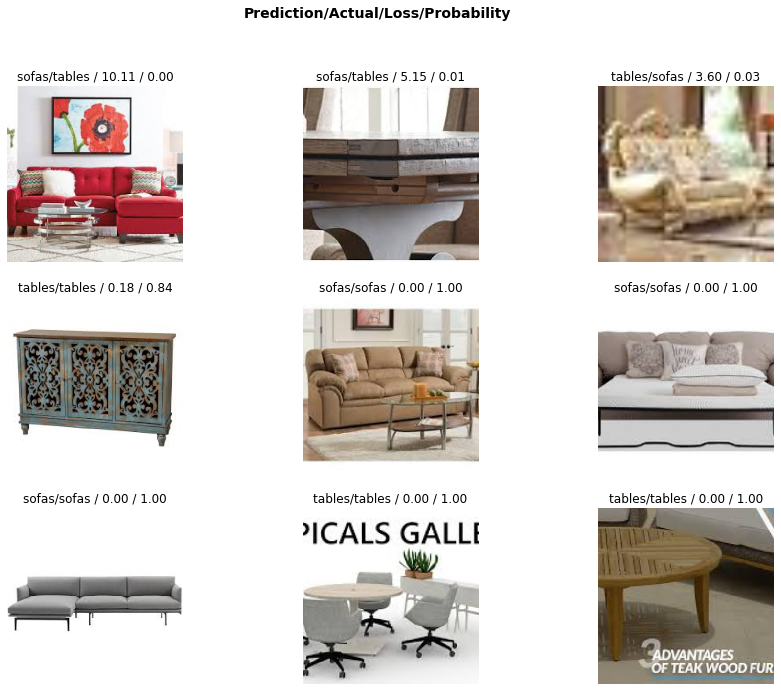

In [9]:
interp.plot_top_losses(9, figsize=(15,11))

In [10]:
interp.most_confused(min_val=2)

[('tables', 'sofas', 2)]